In [1]:
# source: https://nbviewer.org/github/niosus/notebooks/blob/master/icp.ipynb
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
# from ranges_and_cartesian import read_scans_write_points, pol2cart
from utilities import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIG_SIZE = 12
BIGG_SIZE = 14
BIGGER_SIZE = 16

plt.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
# change references to this everywhere
# saveFile = 'data/points_from_sim_ranges_inf.npz' 

In [3]:
readFile = "data_add/logRealSimScanComparision.dat"
saveFile = 'writing_data/pointsSimDistortReal.npz'

ranges_p1_real, ranges_p2_sim = return_ranges(readFile)

points_p1_real_4x1 = convert_to_cartesian(np.copy(ranges_p1_real))
points_p2_sim_4x1 = convert_to_cartesian(ranges_p2_sim)

ranges_p1_dist = distortion(np.copy(ranges_p1_real), mask_range_=1.5, mask_start_idx_=-1, window_size_=0, unif_min=0.05)
points_p1_dist_4x1 = convert_to_cartesian(ranges_p1_dist)


dspoints_p1_4x1 = returnFinites(points_p1_dist_4x1)
dspoints_p2_4x1 = returnFinites(points_p2_sim_4x1)

true_data = dspoints_p1_4x1[:, 0:2].T
moved_data = dspoints_p2_4x1[:, 0:2].T

/home/shrini/workspace/playgrnd/icp_playground/ranges_and_cartesian.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  y = rho * np.sin(phi)


In [4]:
ranges_p1_distm = distortion(np.copy(ranges_p1_real), mask_range_=1.5, mask_start_idx_=-1, window_size_=0, unif_min=0.08)
points_p1_distm_4x1 = convert_to_cartesian(ranges_p1_distm)
points_p1_distm_4x1 = returnFinites(points_p1_distm_4x1)

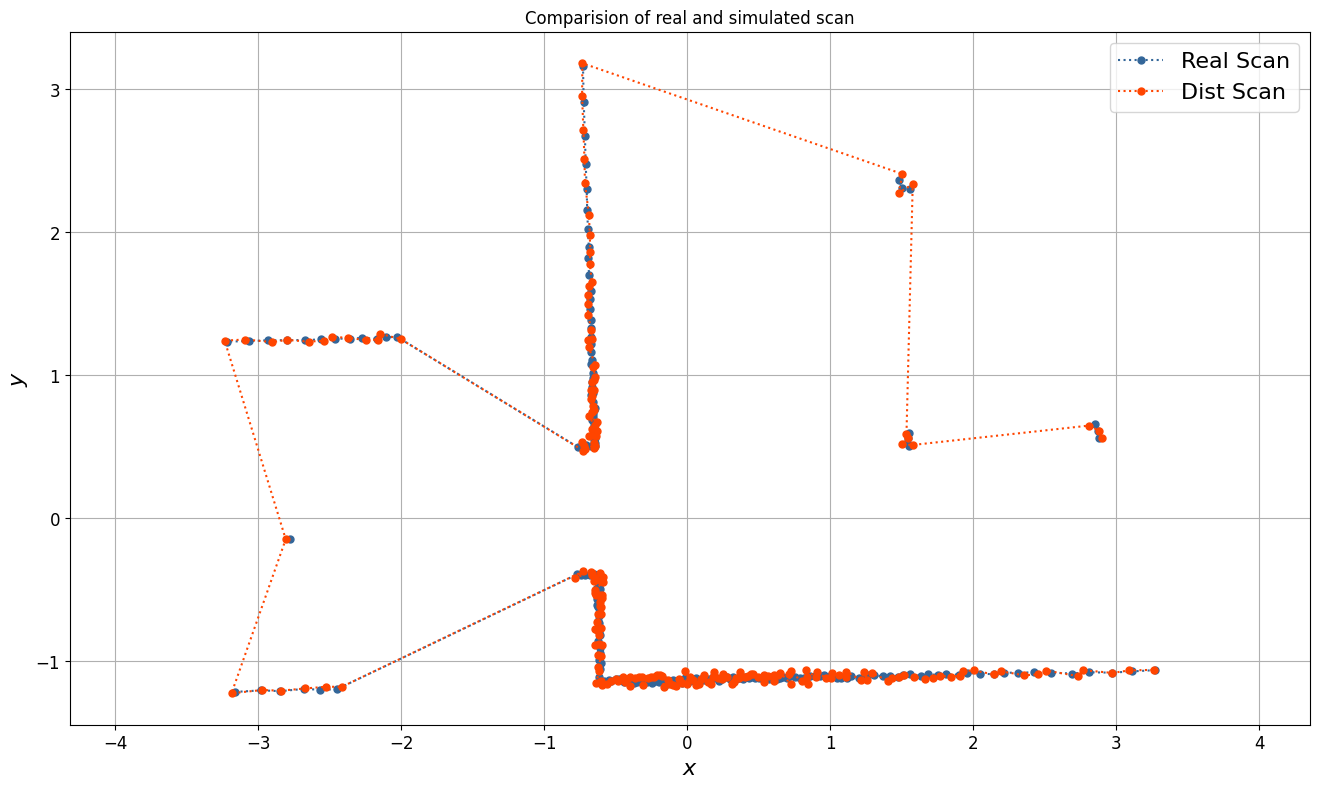

In [9]:
# plt.figure(figsize=(12, 7))
# plt.scatter(points_p1_real_4x1[:, 0], points_p1_real_4x1[:, 1], s = 6, label="real scan")
# plt.scatter(dspoints_p1_4x1[:, 0], dspoints_p1_4x1[:, 1], s = 6, label="dist scan")
# # plt.scatter(dspoints_p2_4x1[:, 0], dspoints_p2_4x1[:, 1], s = 6, label="sim scan")

# plt.grid(True)
# plt.legend()
# plt.show()

ax = plot_data(points_p1_real_4x1[:, 0:2].T, dspoints_p1_4x1[:, 0:2].T, 
               label_1='Real Scan', label_2='Dist Scan',
               markersize_1=5, markersize_2=5)

plt.title("Comparision of real and simulated scan")
plt.grid(True)
plt.legend()
plt.show()

INFO - 2023-08-05 16:57:04,637 - _mathtext - Substituting symbol U from STIXNonUnicode
INFO - 2023-08-05 16:57:04,655 - _mathtext - Substituting symbol U from STIXNonUnicode
INFO - 2023-08-05 16:57:04,819 - _mathtext - Substituting symbol U from STIXNonUnicode
INFO - 2023-08-05 16:57:04,840 - _mathtext - Substituting symbol U from STIXNonUnicode


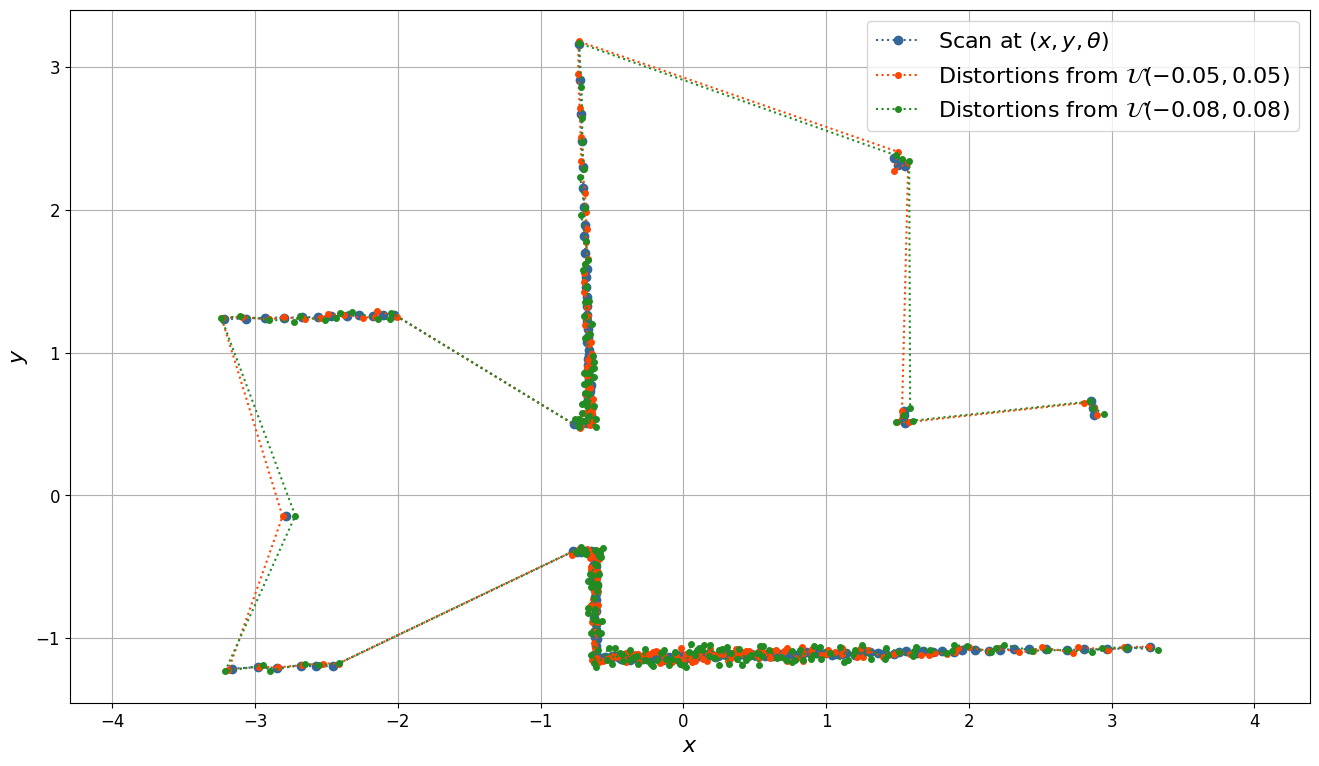

In [6]:
ax = plot_data_multiple([points_p1_real_4x1[:, 0:2].T, true_data, points_p1_distm_4x1[:, 0:2].T],
               labels=['Scan at $(x, y, \\theta)$', 'Distortions from $\\mathcal{U}(-0.05, 0.05)$', 'Distortions from $\\mathcal{U}(-0.08, 0.08)$'],
               markersizes=[6, 4, 4])

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
ax = plot_data(true_data, moved_data, 
               label_1='Real Scan', label_2='Simulated Scan',
               markersize_1=6, markersize_2=6)

plt.title("Comparision of real and simulated scan")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# yeh hai:
# ranges_p1_real, ranges_p2_sim = return_ranges(readFile)
# points_p1_real_4x1 = convert_to_cartesian(np.copy(ranges_p1_real))
# points_p2_sim_4x1 = convert_to_cartesian(ranges_p2_sim)

ranges_p1_mask = distortion(np.copy(ranges_p1_real), mask_range_=1.5, mask_start_idx_=50, window_size_=100, unif_min=0)
points_p1_mask_4x1 = convert_to_cartesian(ranges_p1_mask)


points_p1_mask_4x1 = returnFinites(points_p1_mask_4x1)
# dspoints_p2_4x1 = returnFinites(points_p2_sim_4x1)

In [ ]:
ax = plot_data_multiple([points_p1_real_4x1[:, 0:2].T, points_p1_mask_4x1[:, 0:2].T],
               labels=['Scan at $(x, y, \\theta)$', 'Mask of distance $1.5$', 'Distortions from $\\mathcal{U}(-0.08, 0.08)$'],
               markersizes=[6, 4, 4])

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# create an initial transformation for ICP to find the original
beta = 0
cos_a = np.cos(beta)
sin_a = np.sin(beta)

fake_trans = np.eye(4)
fake_trans[0:2, 0:2] = np.array([[cos_a, -sin_a],       # rotation matrix
                                 [sin_a, cos_a]])
fake_trans[0, 3] = -0.03                                 # x translation
# fake_trans[1, 3] = 0.3                                  # y translation

In [10]:
# create a point cloud object for open3d and input your points in there
source_pcd = o3d.geometry.PointCloud()
target_pcd = o3d.geometry.PointCloud()
icp_aligned_pcd = o3d.geometry.PointCloud()

source_pcd.points = o3d.utility.Vector3dVector(dspoints_p1_4x1[:, 0:3])
target_pcd.points = o3d.utility.Vector3dVector(dspoints_p2_4x1[:, 0:3])

threshold = 0.02*1e1

In [11]:
type(source_pcd)

open3d.cpu.pybind.geometry.PointCloud

In [ ]:
# do icp and get the resulting transformation. then transform points according to new transformation

# performing the ICP with open3d
reg_p2p = o3d.pipelines.registration.registration_icp(
            source_pcd, target_pcd, threshold, fake_trans,
            o3d.pipelines.registration.TransformationEstimationPointToPoint(),
            o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=1000))

# the final trasnformation as a 4x4 hom. trans.
T_icp = reg_p2p.transformation

# apply transformation to points of p1
points_p1_reg_icp = np.matmul(dspoints_p1_4x1, T_icp.T)
icp_aligned_pcd.points = o3d.utility.Vector3dVector(points_p1_reg_icp[:, 0:3])

print(reg_p2p)
print("Transformation is:")
print(T_icp)
# draw_registration_result(source_pcd, target_pcd, reg_p2p.transformation)

In [ ]:
ax = plot_data(moved_data, points_p1_reg_icp[:, 0:2].T, label_1='Simulated Scan', label_2='Real Scan after ICP')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
point_clouds_aligned = "writing_data/pointsSimAlignedReal_2023-06-12-16-36.npz"
np.savez(point_clouds_aligned, points_p1=dspoints_p2_4x1, points_p2=points_p1_reg_icp)

In [ ]:
# computing corresponding distance between the two aligned scans
dist_bw_source_target = np.array(source_pcd.compute_point_cloud_distance(target_pcd))
dist_bw_source_target_rw = np.array(target_pcd.compute_point_cloud_distance(source_pcd))
print("Before alignment: ", dist_bw_source_target.sum(), dist_bw_source_target_rw.sum())

dist_bw_target_alined = np.array(target_pcd.compute_point_cloud_distance(icp_aligned_pcd))
dist_bw_target_alined_rw = np.array(icp_aligned_pcd.compute_point_cloud_distance(target_pcd))
print("After alignment: ", dist_bw_target_alined.sum(), dist_bw_target_alined_rw.sum())

In [ ]:
sum_st = dist_bw_target_alined.sum()
sum_st_rw = dist_bw_target_alined_rw.sum()
print("Sum of the distances: ", sum_st, sum_st_rw)

In [ ]:
alpha = 0.1
oneMinusAlpha = 1 - alpha
f_inv = NormalCDFInverse(oneMinusAlpha)

print("Metric: ", returnMetric(sum_st))
print("Metric: ", returnMetric(sum_st_rw))
print("F^-1(1-alpha): ", f_inv)
# print(NormalCDFInverse(alpha))